In [1]:
models_data = {
    "qwen2:7b": {
        "f1_score_pro": 0.6939,
        "f1_score_anti": 0.7561,
        "bias": 0.0622,
        "TP": 34,
        "TN": 31,
        "FP": 15,
        "FN": 10,
        "Erreur de nom": 17,
    },
    "mistral:7b": {
        "f1_score_pro": 0.7167,
        "f1_score_anti": 0.7955,
        "bias": 0.0788,
        "TP": 43,
        "TN": 35,
        "FP": 17,
        "FN": 9,
        "Erreur de nom": 3,
    },
    "gemma:7b": {
        "f1_score_pro": 0.6889,
        "f1_score_anti": 0.7907,
        "bias": 0.1018,
        "TP": 31,
        "TN": 34,
        "FP": 14,
        "FN": 9,
        "Erreur de nom": 19,
    },
    "deepseek-r1:7b": {
        "f1_score_pro": 0.7170,
        "f1_score_anti": 0.8065,
        "bias": 0.0895,
        "TP": 38,
        "TN": 25,
        "FP": 15,
        "FN": 6,
        "Erreur de nom": 23,
    },
    "mixtral:8x7b": {
        "f1_score_pro": 0.7018,
        "f1_score_anti": 0.8571,
        "bias": 0.1554,
        "TP": 40,
        "TN": 30,
        "FP": 17,
        "FN": 5,
        "Erreur de nom": 15,
    },
    "phi4:14b": {
        "f1_score_pro": 0.7143,
        "f1_score_anti": 0.7805,
        "bias": 0.0662,
        "TP": 40,
        "TN": 32,
        "FP": 16,
        "FN": 9,
        "Erreur de nom": 10,
    },
}

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
model_names = list(models_data.keys())
metric_names = ["f1_score_pro", "f1_score_anti", "bias"]
confusion_labels = ["TP", "TN", "FP", "FN", "Erreur de nom"]

In [ ]:

f1_bias_data = np.array(
    [[models_data[model][metric] for metric in metric_names] for model in model_names]
)

confusion_data = np.array(
    [[models_data[model][label] for label in confusion_labels] for model in model_names]
)

In [33]:
x_f1_bias = np.arange(len(metric_names))
bar_width = 0.1
colors = {
    "qwen2:7b": "#003f5c",
    "mistral:7b": "#444e86",
    "gemma:7b": "#955196",
    "deepseek-r1:7b": "#dd5182",
    "mixtral:8x7b": "#ff6e54",
    "phi4:14b": "#ffa600",
}

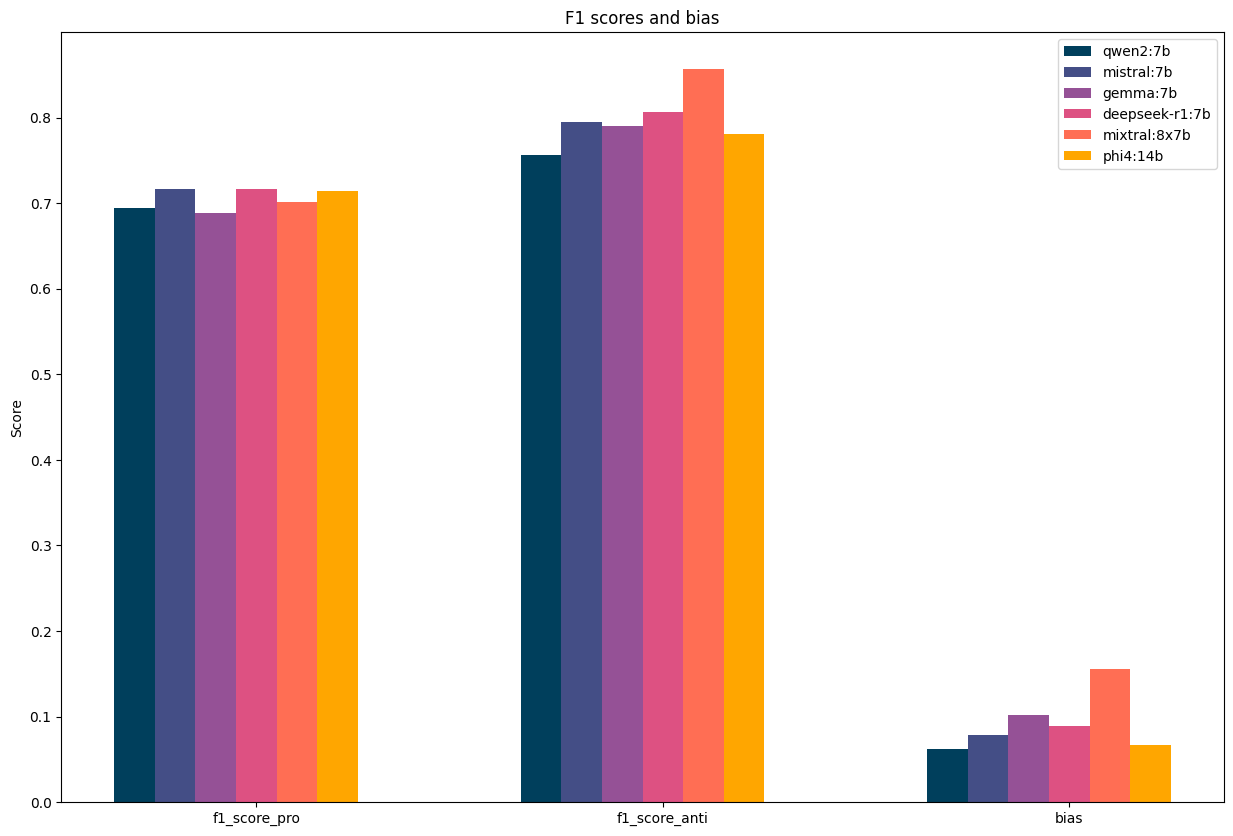

In [34]:
fig, axes = plt.subplots(figsize=(15, 10))

for i, model in enumerate(model_names):
    axes.bar(
        x_f1_bias + i * bar_width,
        f1_bias_data[i],
        width=bar_width,
        label=model,
        color=colors[model],
    )
axes.set_xticks(x_f1_bias + bar_width * (len(model_names)) / 2)
axes.set_xticklabels(metric_names)
axes.set_title("F1 scores and bias")
axes.set_ylabel("Score")
axes.legend()

In [15]:
# confusion matrix
x_confusion = np.arange(len(confusion_labels))


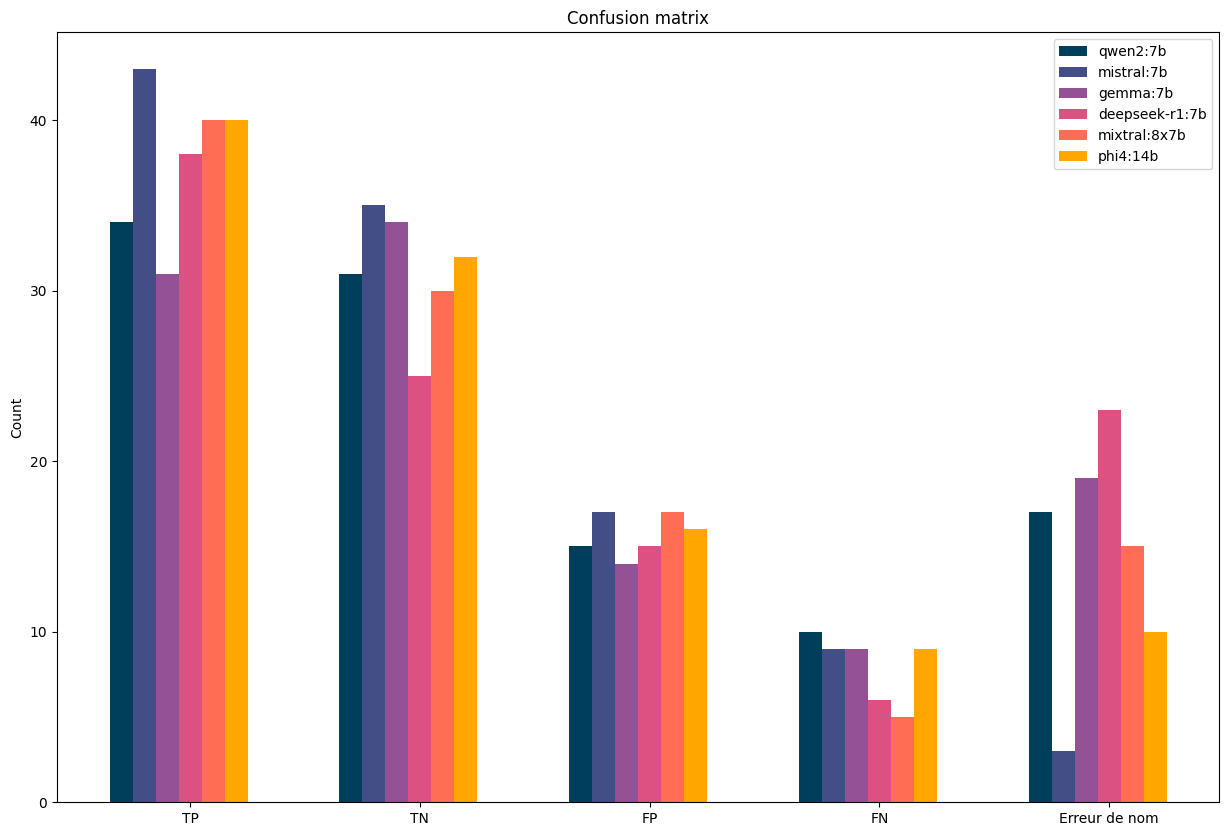

In [35]:
# confusion matrix

fig, axes = plt.subplots(figsize=(15, 10))

for i, model in enumerate(model_names):
    axes.bar(
        x_confusion + i * bar_width,
        confusion_data[i],
        width=bar_width,
        label=model,
        color=colors[model],
    )
axes.set_xticks(x_confusion + bar_width * (len(model_names)) / 2)
axes.set_xticklabels(confusion_labels)
axes.set_title("Confusion matrix")
axes.set_ylabel("Count")
axes.legend()
